# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. 
 
The "goal" field refers to the presence of heart disease in the patient. 

It is integer (0 for no presence, 1 for presence). 

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----
**Read in the data.**

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

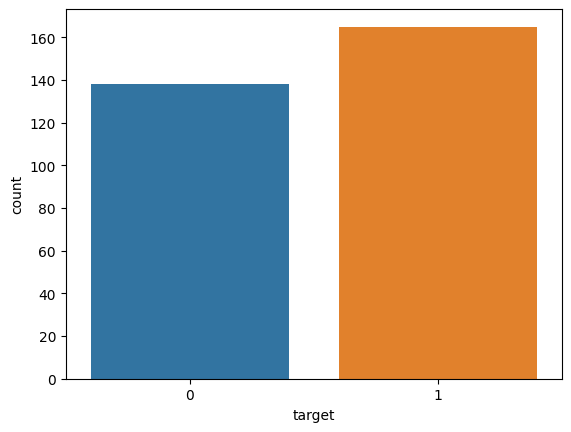

In [7]:
# 0 for no presence of heart disease, 1 for presence of heart disease
sns.countplot(x='target',data=df)

**Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

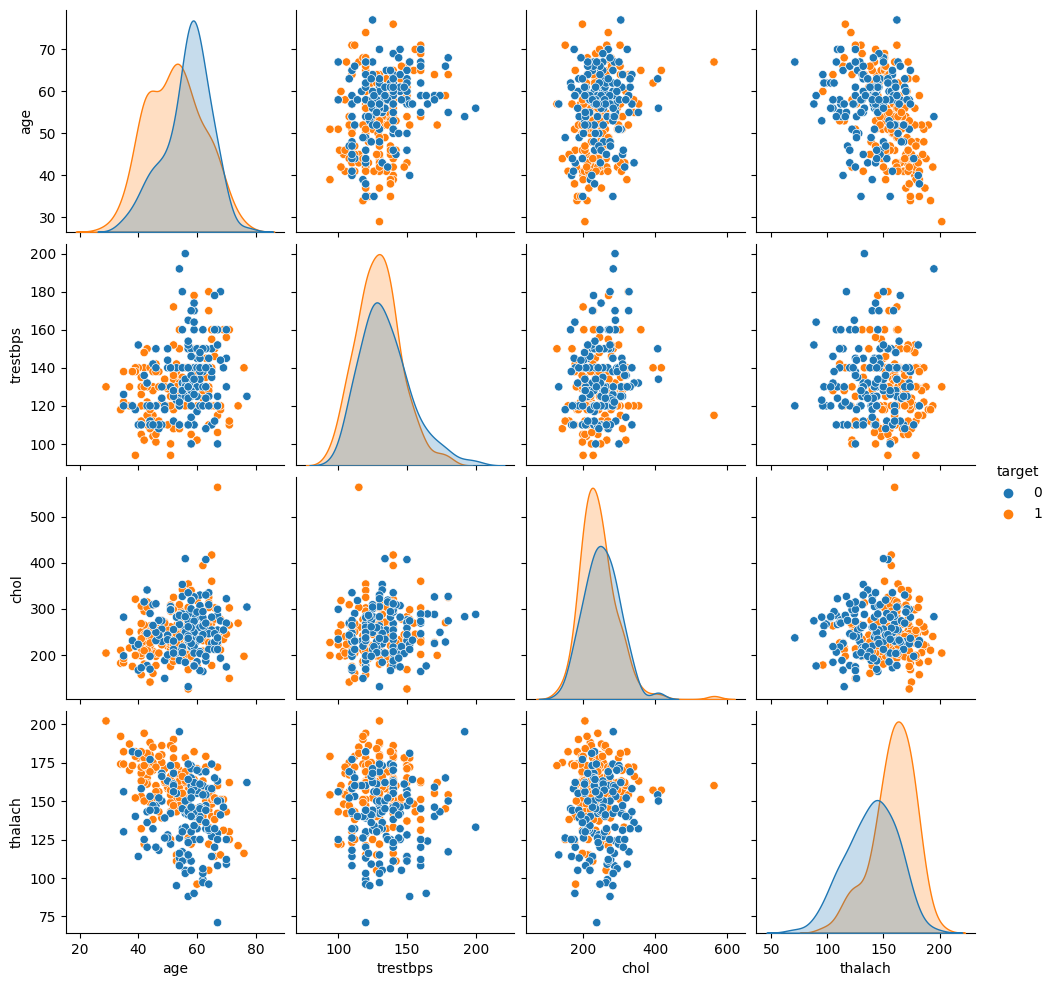

In [8]:
# Add hue=target to add test results to scatter plot.
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target')

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

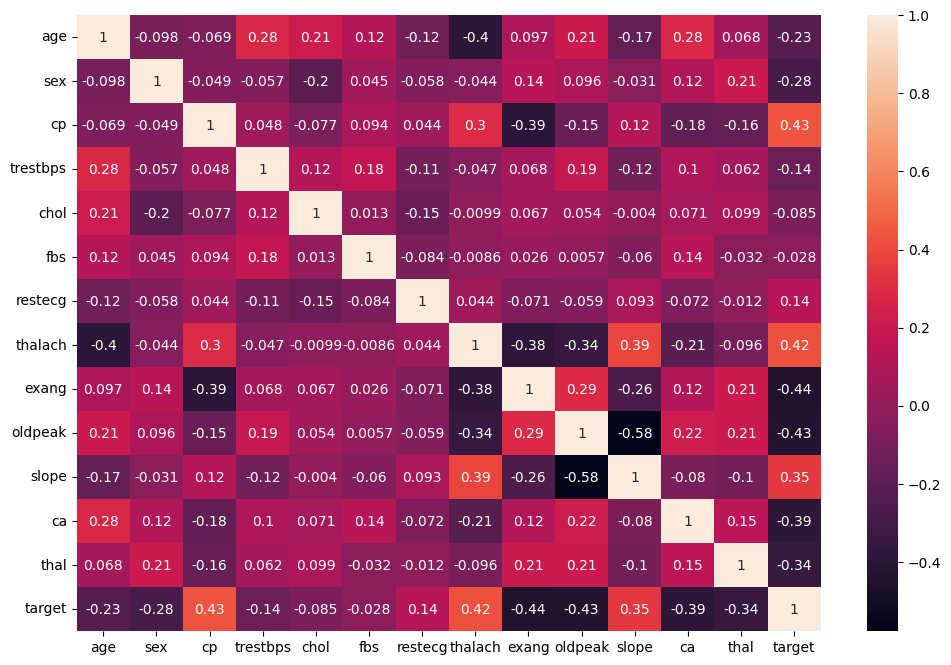

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [10]:
X = df.drop('target',axis=1)
y = df['target']

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Create a Logistic Regression model** 

**Train and fit a logistic regression model on the training set.**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**Report back the model's coefficients.**

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the **odds** and can not be directly interpreted as in linear regression.

In [17]:
logmodel.coef_

array([[-0.07200459, -0.73512355,  0.89380134, -0.26263404, -0.21252883,
         0.04626827,  0.12005867,  0.4336183 , -0.42815523, -0.5261547 ,
         0.38193418, -0.85118686, -0.57463534]])

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret. Use np.exp()**

In [18]:
# Calculate the exponential of all elements in the input array
np.exp(logmodel.coef_)

array([[0.93052663, 0.47944622, 2.44440401, 0.76902328, 0.80853701,
        1.04735535, 1.12756301, 1.54282985, 0.65171024, 0.59087269,
        1.46511564, 0.42690795, 0.5629101 ]])

This means:

* The odds for both Age (1st column) and Chest Pain (CP) (3rd column) are **positive**, meaning that they are **positively associated** with having heart condition (**class 1**). 

* Let's focus on (CP). We can interpret this as follows. For a 1 unit increase in chest pain type we expect the odds of having heart condition to increase by almost two times (240\%).

* On the other hand, as Age increases by 1 unit, the odds of having heart condition are 90%.

* For odds less than 1 (negative coefficients), we can take 1/odds to make even better sense of them. So as Age increases by 1, the odds of **not having** heart condition are 1/0.90 or 110%. What if Age was -0.15 ? what are the odds ? 

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, precision_score, recall_score

In [20]:
y_pred = logmodel.predict(scaled_X_test)

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "confusion_matrix.jpg")

In [22]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

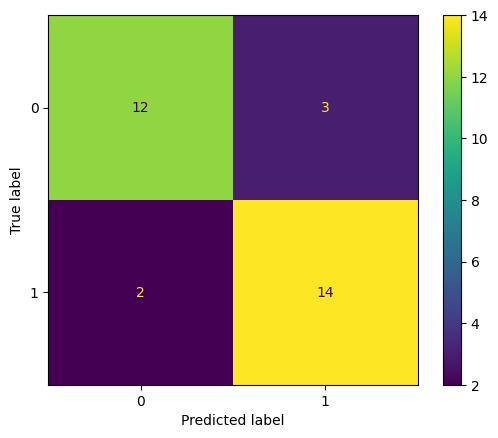

In [23]:
plot_confusion_matrix(logmodel,scaled_X_test,y_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_test, y_pred)

0.8235294117647058

In [27]:
recall_score(y_test, y_pred)

0.875

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [28]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

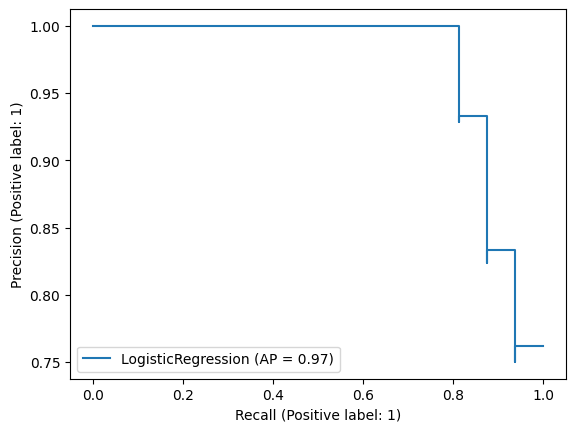

In [29]:
plot_precision_recall_curve(logmodel,scaled_X_test,y_test)

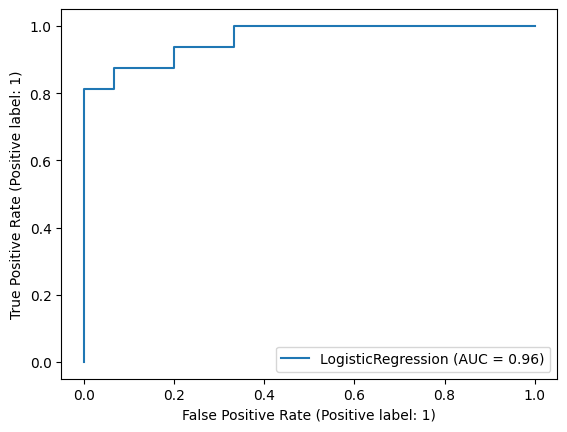

In [30]:
plot_roc_curve(logmodel,scaled_X_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [31]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [32]:
logmodel.predict(patient)

array([0], dtype=int64)

In [33]:
logmodel.predict_proba(patient)

array([[1.00000000e+00, 4.08196334e-23]])

----

## Great Job!